Available countries: 255
Sample countries: ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina']


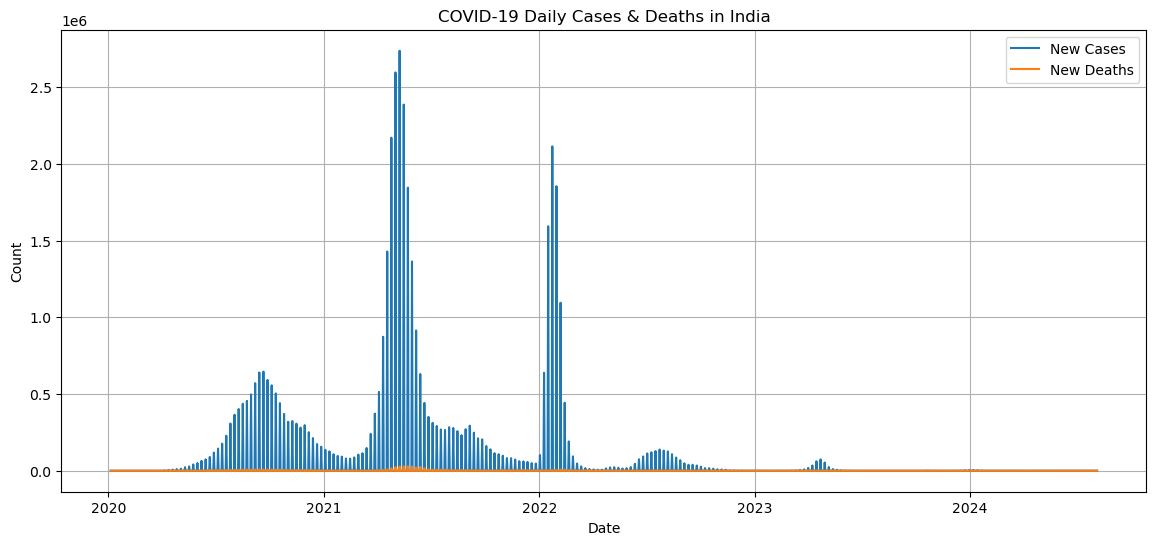

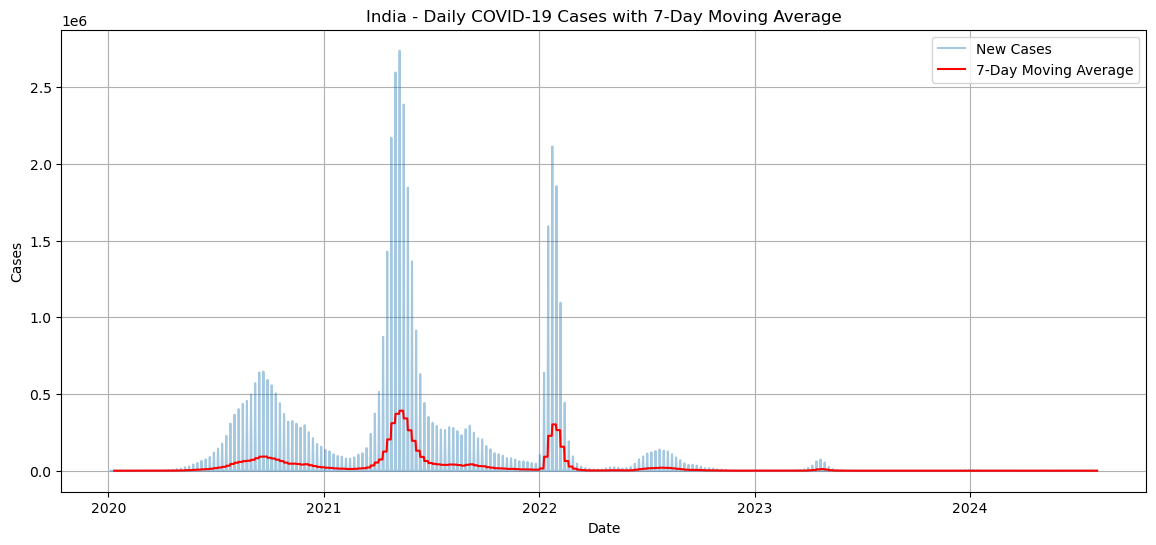

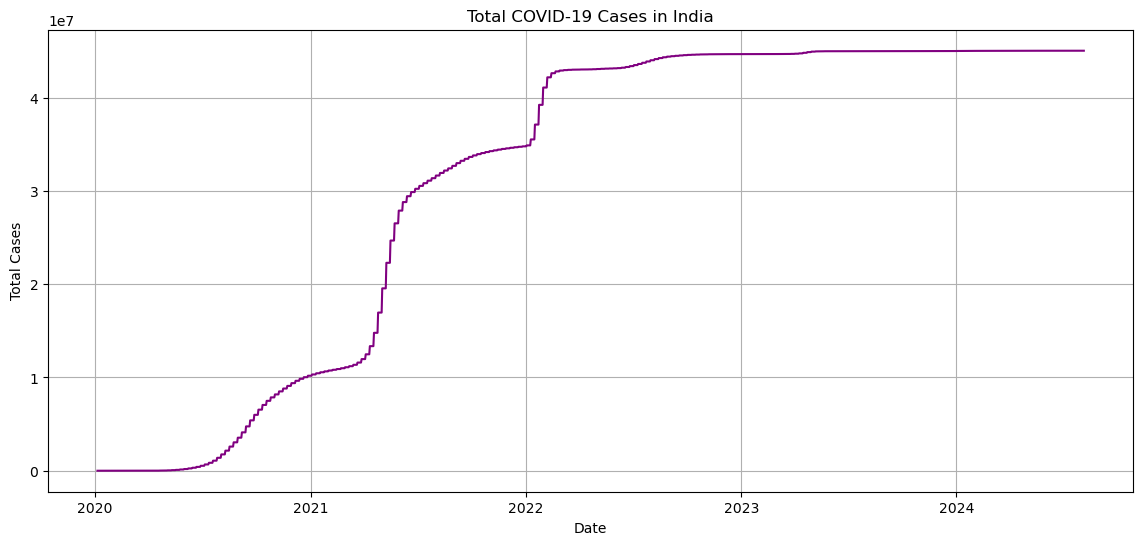

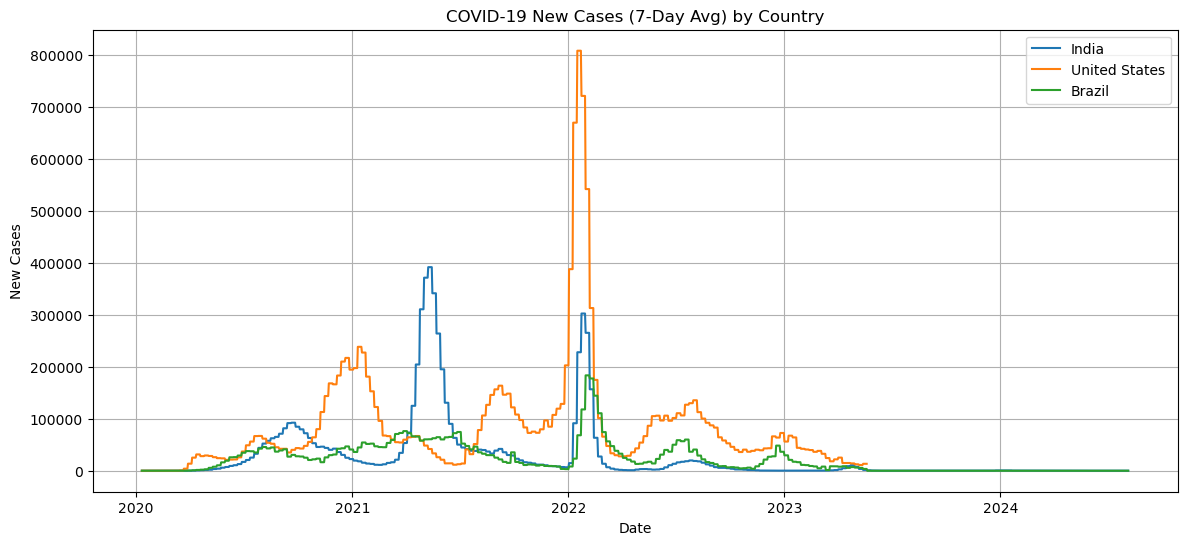

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('owid-covid-data.csv')
print("Available countries:", df['location'].nunique())
print("Sample countries:", df['location'].unique()[:10])
country = 'India'
country_df = df[df['location'] == country].copy()
country_df['date'] = pd.to_datetime(country_df['date'])
country_df['new_cases_ma'] = country_df['new_cases'].rolling(window=7).mean()
plt.figure(figsize=(14, 6))
plt.plot(country_df['date'], country_df['new_cases'], label='New Cases')
plt.plot(country_df['date'], country_df['new_deaths'], label='New Deaths')
plt.title(f'COVID-19 Daily Cases & Deaths in {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 6))
plt.plot(country_df['date'], country_df['new_cases'], alpha=0.4, label='New Cases')
plt.plot(country_df['date'], country_df['new_cases_ma'], label='7-Day Moving Average', color='red')
plt.title(f'{country} - Daily COVID-19 Cases with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 6))
plt.plot(country_df['date'], country_df['total_cases'], color='purple')
plt.title(f'Total COVID-19 Cases in {country}')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.show()
countries = ['India', 'United States', 'Brazil']
plt.figure(figsize=(14, 6))
for c in countries:
    c_df = df[df['location'] == c].copy()
    c_df['date'] = pd.to_datetime(c_df['date'])
    c_df['new_cases_ma'] = c_df['new_cases'].rolling(7).mean()
    plt.plot(c_df['date'], c_df['new_cases_ma'], label=c)

plt.title('COVID-19 New Cases (7-Day Avg) by Country')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()


country_df.to_csv(f'{country.lower()}_covid_data_filtered.csv', index=False)